In [ ]:
import csv
from pprint import pprint as pp
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import re
import country_converter as coco
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import wptools as wp

from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from random import uniform
from bs4 import BeautifulSoup
import time
from statistics import median
import nltk
nltk.download('stopwords')

%matplotlib inline

Step4: Visualisation







Have a look at what we have in final_cleaned.csv

In [ ]:
pd.set_option('display.max_columns', 100)
df = pd.read_csv('final_cleaned.csv', encoding='utf-8')
df.describe(include='all')

,release_date,song_popularity,duration(ms),explicit,artist_name,artist_follower_no,artist_genres,artist_popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,birth_year,artist_country,gender,band,repetitions_rate,mean_sentence_len,mean_word_len,unique_words_rate,total_words,total_char,count_word_i,count_word_you,count_word_oh,count_word_know,count_word_it,count_word_like,count_word_got,count_word_and,count_word_yeah,count_word_we,count_word_one,count_word_love,count_word_the,count_word_go,count_word_time,count_word_get,count_word_me,count_word_when,count_word_come,count_word_all,release_year,birth_decade
count,7201,7201.000000,7.201000e+03,7201,7201,7.156000e+03,6112,7156.000000,7088.000000,7088.000000,7088.000000,7088.000000,7088.000000,7088.000000,7088.000000,7088.000000,7088.000000,7088.000000,7088.000000,7088.000000,2394.000000,4797,1759,5464,4326.000000,4326.000000,4326.000000,4326.000000,4326.000000,4326.000000,4326.000000,4326.000000,4326.000000,4326.000000,4326.000000,4326.000000,4326.000000,4326.000000,4326.000000,4326.000000,4326.000000,4326.000000,4326.000000,4326.000000,4326.000000,4326.000000,4326.000000,4326.000000,4326.000000,4326.000000,7201,2223
unique,2476,NaN,NaN,2,3071,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,6
top,2013-01-01,NaN,NaN,False,Taylor Swift,NaN,metal / rock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,male,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010s,1980s
freq,102,NaN,NaN,6682,103,NaN,2189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3041,1083,3103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4016,689
mean,NaN,51.909874,2.836999e+05,NaN,NaN,5.349250e+06,NaN,57.544019,0.234114,0.560011,0.654176,0.093363,5.254233,0.183286,-7.519805,0.664362,0.062855,121.355241,3.951185,0.475572,1973.570593,NaN,NaN,NaN,38.505920,31.739457,5.063576,0.221031,311.104022,1115.302589,15.612344,12.412159,2.301433,1.889736,5.855756,1.980120,1.172908,6.188858,1.408692,3.058715,0.993528,1.868932,10.042996,1.139390,0.965326,1.130143,5.037448,1.439667,0.855294,2.283634,NaN,NaN
std,NaN,18.108126,4.465146e+05,NaN,NaN,1.220875e+07,NaN,21.094275,0.289355,0.156850,0.224133,0.233510,3.568908,0.149729,3.905956,0.472246,0.061866,28.189055,0.251736,0.245466,23.983266,NaN,NaN,NaN,13.995913,11.155487,0.383404,0.085498,160.170650,583.789186,14.423815,12.278089,7.757792,4.230099,7.907178,6.704641,2.896945,6.248694,5.188592,5.902308,2.597100,5.670952,9.148309,2.983304,2.470861,3.261466,7.197976,2.594247,2.908763,3.603434,NaN,NaN
min,NaN,1.000000,5.191900e+04,NaN,NaN,0.000000e+00,NaN,0.000000,0.000001,0.058600,0.000088,0.000000,0.000000,0.015700,-43.185000,0.000000,0.022700,43.509000,3.000000,0.000010,1734.000000,NaN,NaN,NaN,2.400000,10.500000,3.000000,0.010000,5.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,41.000000,1.979730e+05,NaN,NaN,1.314558e+05,NaN,49.000000,0.012475,0.460000,0.507000,0.000000,2.000000,0.094600,-9.147250,0.000000,0.033200,100.010000,4.000000,0.278750,1964.000000,NaN,NaN,NaN,28.970000,26.192500,4.830000,0.160000,210.000000,758.000000,5.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,54.000000,2.258530e+05,NaN,NaN,9.766980e+05,NaN,62.000000,0.091750,0.567500,0.696000,0.000048,5.000000,0.122000,-6.522000,1.000000,0.042100,119.988000,4.000000,0.466500,1981.000000,NaN,NaN,NaN,37.260000,30.820000,5.050000,0.210000,288.000000,1024.000000,12.000000,9

Now separate all columns into different types

In [ ]:
df_numerical = df[['song_popularity', 'duration(ms)', 'artist_follower_no', 'artist_popularity', 
                   'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence', 
                   'repetitions_rate', 'mean_sentence_len', 'mean_word_len', 'unique_words_rate',
                   'total_words', 'total_char', 'count_word_i', 'count_word_you', 'count_word_oh', 'count_word_know', 'count_word_it', 'count_word_like', 'count_word_got', 'count_word_and', 'count_word_yeah', 'count_word_we',
                   'count_word_one', 'count_word_love', 'count_word_the', 'count_word_go', 'count_word_time', 'count_word_get', 'count_word_me', 'count_word_when', 'count_word_come', 'count_word_all']]
categories_list = ['release_date', 'release_year', 'explicit', 'artist_genres', 'birth_year', 'birth_decade', 'artist_country', 'gender', 'band']
df_unique = df[['artist_name']]


Step4a: Analyze relations between song popularity and numerical parameters

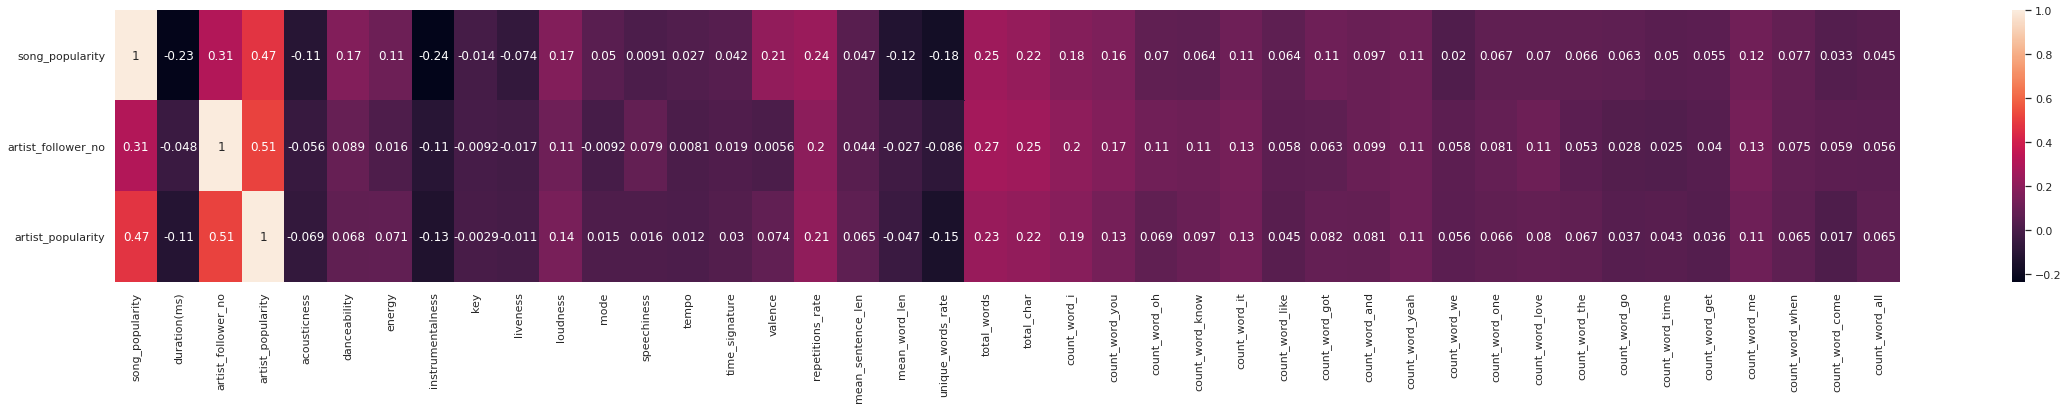

In [ ]:
# df = pd.read_csv('final_cleaned.csv', encoding='utf-8') (we already ran it in the cell above)

correlation_matrix = df_numerical.corr()
c = correlation_matrix[abs(correlation_matrix['song_popularity'])>=0.3]

sns.set(rc = {'figure.figsize':(40,5)})
ax = sns.heatmap(data=c, annot=True)

plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
colors = ['mediumvioletred','purple']
# colorrs = ['purple']
sns.set(style='darkgrid')
# sns.set_palette( "rocket_r")
# sns.set_palette('PuRd_r')
sns.set_palette( colors)
%matplotlib inline

Looks like song popularity is only affected by artist_popularity and artist_follower number. Let's have a closer look.

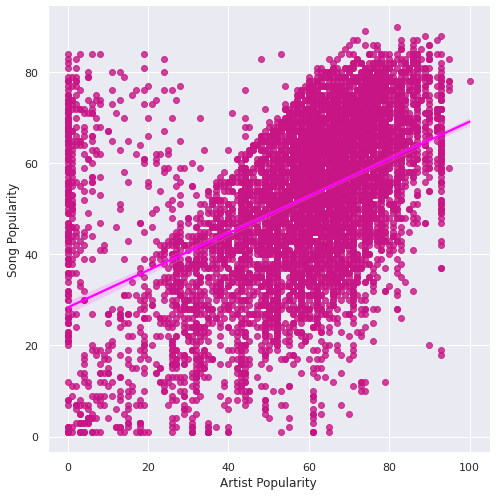

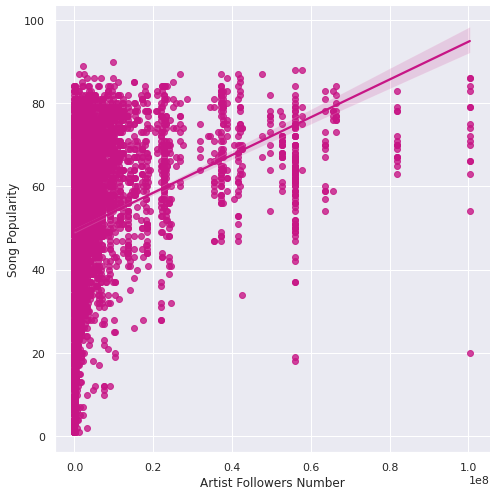

In [ ]:
# f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
# import numpy as np
sns.lmplot(data=df, x='artist_popularity', y="song_popularity", height=7, line_kws={'color': 'magenta'})
plt.xlabel('Artist Popularity')
plt.ylabel('Song Popularity')
sns.lmplot(data=df, x='artist_follower_no', y="song_popularity", height=7)
plt.xlabel('Artist Followers Number')
plt.ylabel('Song Popularity')
plt.tight_layout()
plt.show()



Step4b: Analyze relations between song popularity and categorial parameters (release year, explicit, artist genres, birth decade, artist country, gender, band)

Create a function for displot and kdeplot on relation between song popularity and potential categorical factors.

Use a for loop to fetch displot and kdeplot on relation between song popularity and all the potential categorical factors. The name of factor is shown on each graph.

------------------------------------------------------------------------------------------------
2010s                4016
2000s                1693
1990s                 604
1980s                 311
1970s                 270
1960s and earlier     205
2020s                 102
Name: release_year, dtype: int64


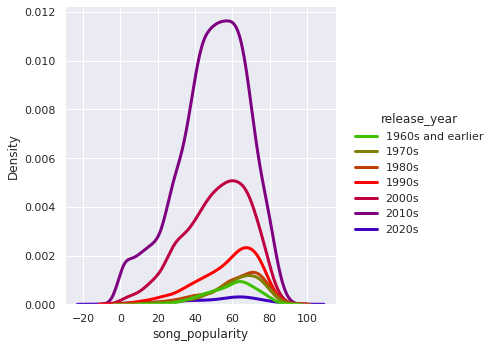

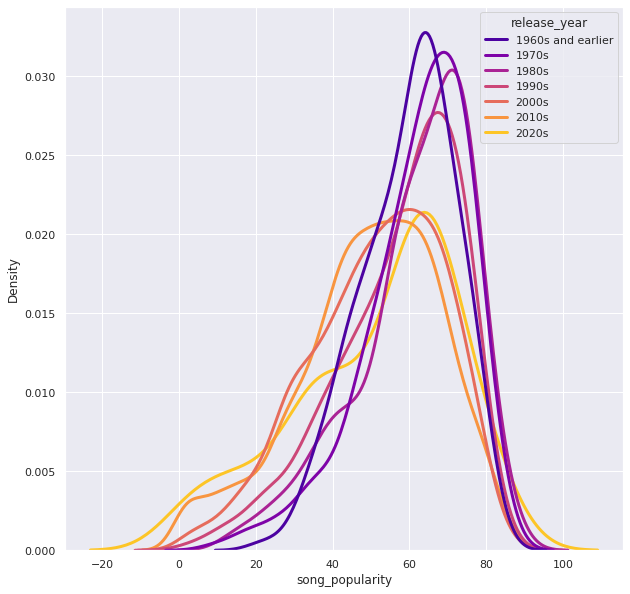

------------------------------------------------------------------------------------------------
False    6682
True      519
Name: explicit, dtype: int64


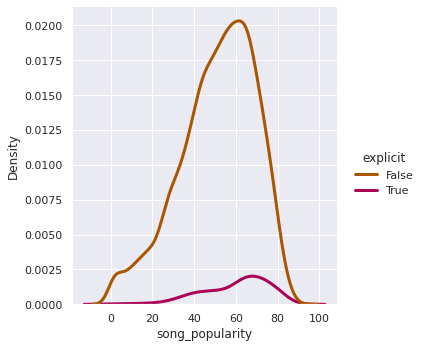

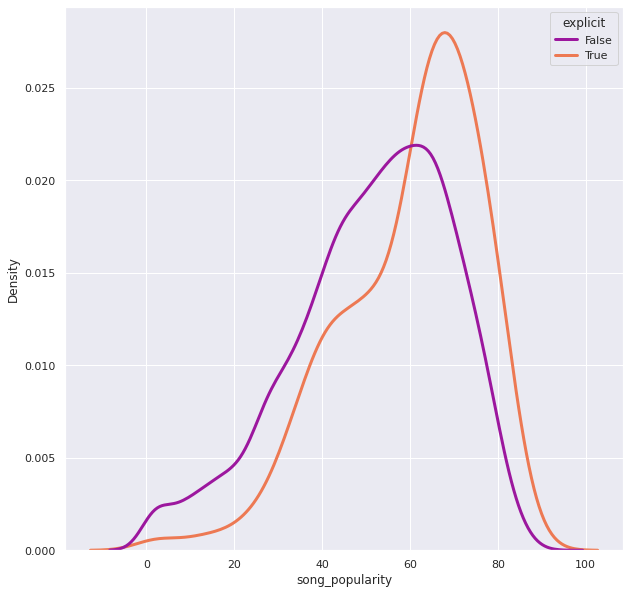

------------------------------------------------------------------------------------------------
metal / rock         2189
electronic           2165
pop                   765
country / folk        379
hip hop / rap         238
christian             225
r&b / soul / jazz     151
Name: artist_genres, dtype: int64


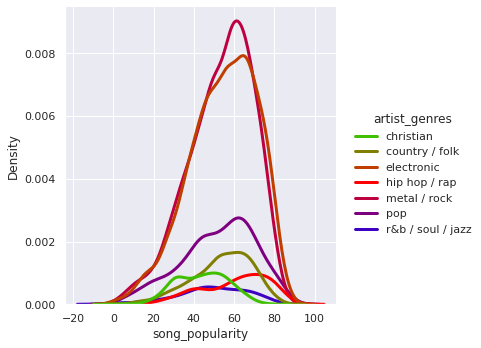

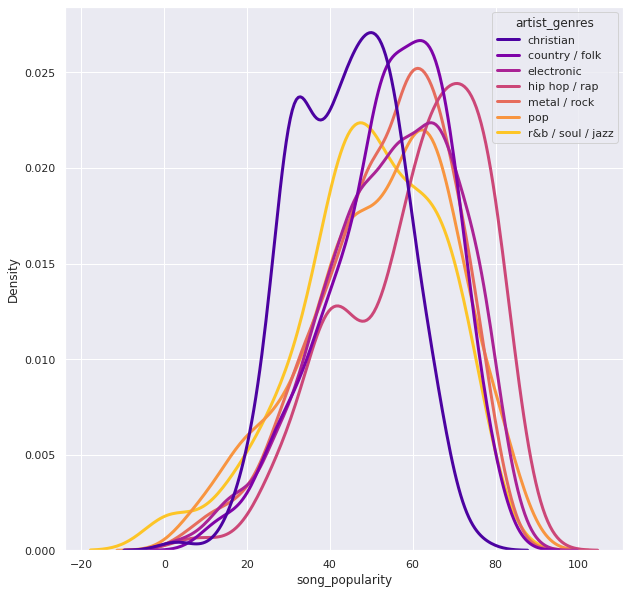

------------------------------------------------------------------------------------------------
1980s                689
1990s and younger    547
1970s                398
1960s                236
1940s                200
1950s                153
Name: birth_decade, dtype: int64


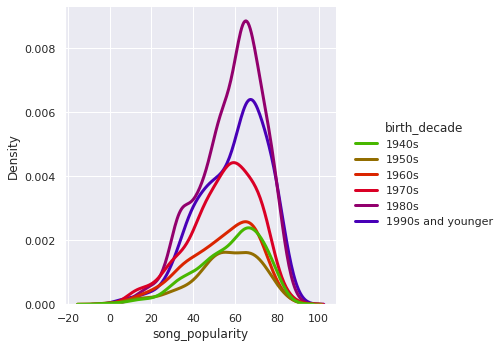

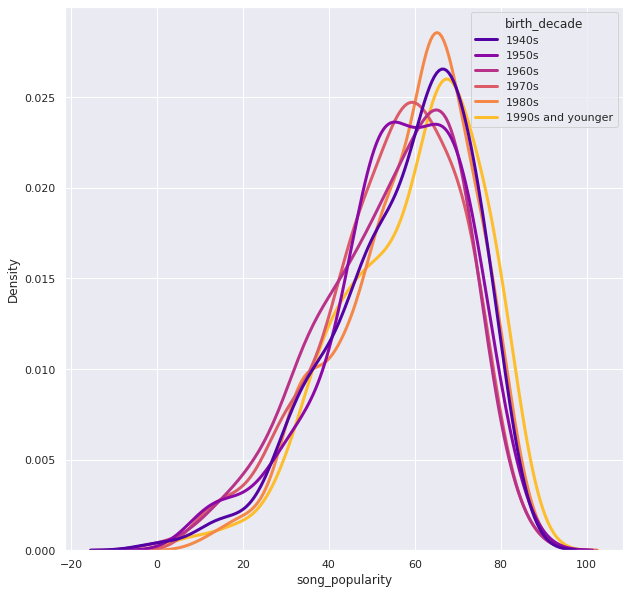

------------------------------------------------------------------------------------------------
United States     3041
United Kingdom     982
Canada             193
Australia          171
Norway             163
Italy / France     142
Sweden             105
Name: artist_country, dtype: int64


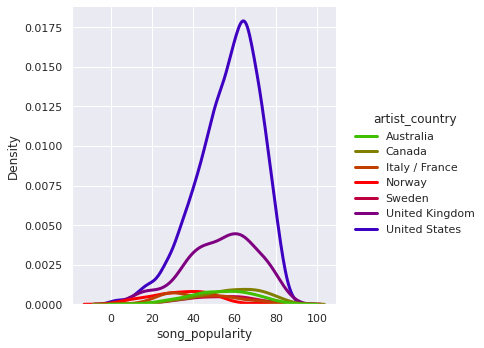

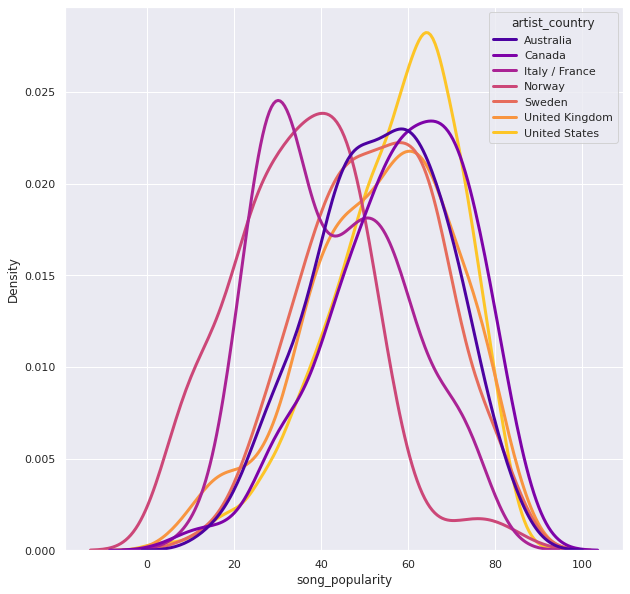

------------------------------------------------------------------------------------------------
male      1083
female     676
Name: gender, dtype: int64


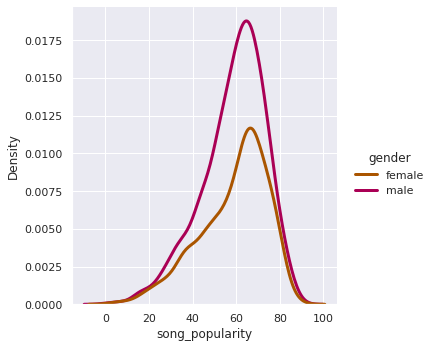

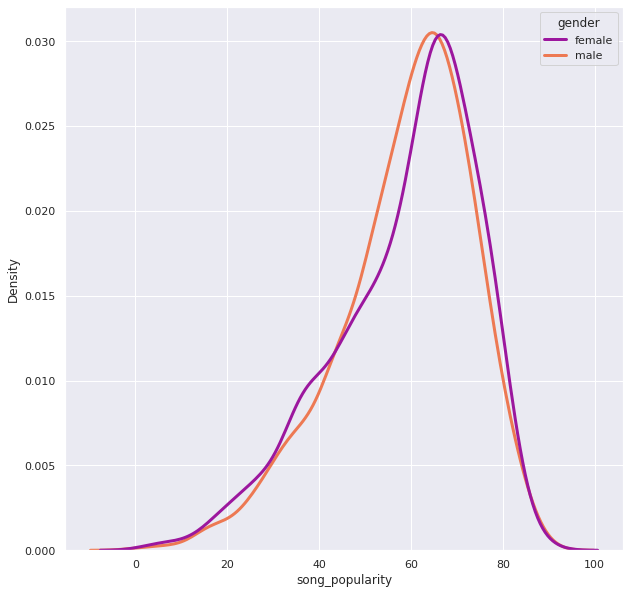

------------------------------------------------------------------------------------------------
False    3103
True     2361
Name: band, dtype: int64


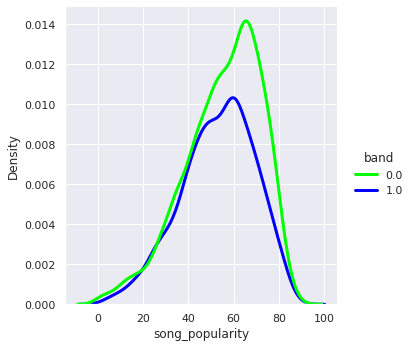

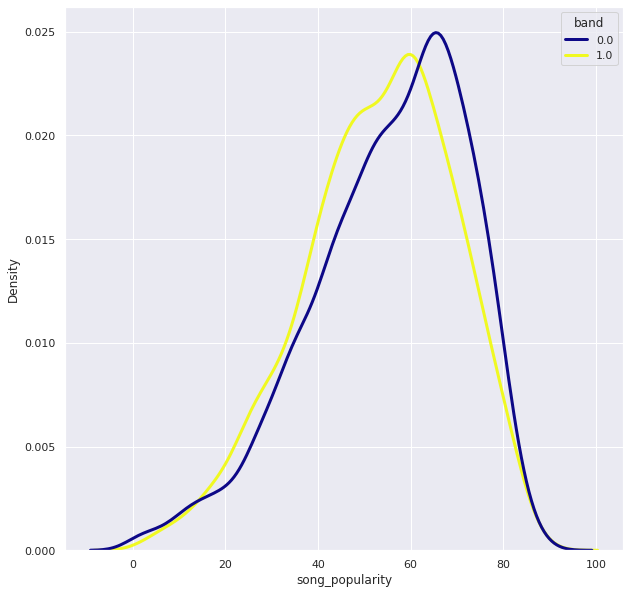

In [ ]:
categories_list = ['release_year', 'explicit', 'artist_genres', 'birth_decade', 'artist_country', 'gender', 'band']
# sns.set_palette( "bright")
for column in categories_list:
    print('------------------------------------------------------------------------------------------------')
    df = df.sort_values(by=column, ascending=True)
    print(df[column].value_counts())
    sns.displot(kind='kde', data=df, x="song_popularity", hue=column, linewidth=3, height=5, palette = 'brg_r')
    plt.show()
    sns.set(rc = {'figure.figsize':(10,10)})
    sns.kdeplot(data=df, x="song_popularity", hue=column, linewidth=3, common_norm=False, palette = "plasma")
    plt.show()

From the diagrams, we conclude that explicit, artist genres, artist_country have significant relation with song popularity

Step4c: Find the most popular artists and take a closer look at the potential factors about themselved that would make them successful

In [ ]:
df_artist = df[['artist_name', 'artist_popularity', 'artist_genres', 'birth_decade', 'artist_country', 'gender']]
df_artist = df_artist.drop_duplicates(subset='artist_name').sort_values('artist_popularity', ascending=False)
df_artist = df_artist[df_artist['artist_popularity']>86]
df_artist

,artist_name,artist_popularity,artist_genres,birth_decade,artist_country,gender
3005,Bad Bunny,100.0,hip hop / rap,1990s and younger,NaN,NaN
2844,Drake,95.0,hip hop / rap,NaN,Canada,male
5797,Taylor Swift,93.0,pop,1980s,United States,female
5482,The Weeknd,92.0,pop,1990s and younger,Canada,NaN
6044,Harry Styles,92.0,pop,1990s and younger,United Kingdom,male
5551,BTS,92.0,pop,NaN,NaN,NaN
5440,Justin Bieber,90.0,pop,1990s and younger,Canada,male
5879,Ed Sheeran,90.0,pop,1990s and younger,United Kingdom,male
2881,Kanye West,90.0,hip hop / rap,1970s,United States,male
2709,Dua Lipa,89.0,electronic,1990s and younger,United Kingdom,female


Since now we have a small sample size, we need to edit some of the details to mantain accuracy.

In [ ]:
#editing some of the missing details to maintain accuracy
df_artist.loc[3005, 'artist_country']='Puerto Rico'
df_artist.loc[2813, 'gender']='male'
df_artist.loc[3005, 'gender']='male'
df_artist.loc[2813, 'birth_decade']='1980s'
df_artist.loc[5482, 'gender']='male'
df_artist.loc[5591, 'gender']='male'
df_artist.loc[5591, 'artist_country']='South Korea'
df_artist.loc[2973, 'gender']='male'
df_artist.loc[2897, 'gender']='male'
df_artist.loc[2924, 'gender']='male'
df_artist.loc[4618, 'gender']='male'
df_artist.loc[3014, 'artist_country']='Puerto Rico'
df_artist.loc[3014, 'gender']='male'
df_artist.loc[638, 'artist_country']='Barbados'

df_artist

,artist_name,artist_popularity,artist_genres,birth_decade,artist_country,gender
3005,Bad Bunny,100.0,hip hop / rap,1990s and younger,Puerto Rico,male
2844,Drake,95.0,hip hop / rap,NaN,Canada,male
5797,Taylor Swift,93.0,pop,1980s,United States,female
5482,The Weeknd,92.0,pop,1990s and younger,Canada,male
6044,Harry Styles,92.0,pop,1990s and younger,United Kingdom,male
5551,BTS,92.0,pop,NaN,NaN,NaN
5440,Justin Bieber,90.0,pop,1990s and younger,Canada,male
5879,Ed Sheeran,90.0,pop,1990s and younger,United Kingdom,male
2881,Kanye West,90.0,hip hop / rap,1970s,United States,male
2709,Dua Lipa,89.0,electronic,1990s and younger,United Kingdom,female


------------------------------------------------------------------------------------------------
hip hop / rap    9
pop              6
electronic       4
metal / rock     1
Name: artist_genres, dtype: int64


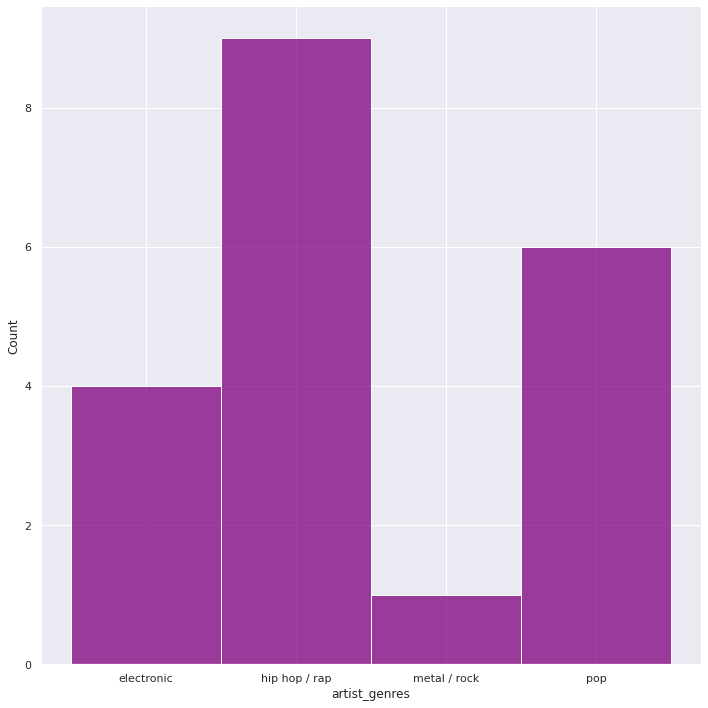

------------------------------------------------------------------------------------------------
1990s and younger    11
1980s                 4
1970s                 3
Name: birth_decade, dtype: int64


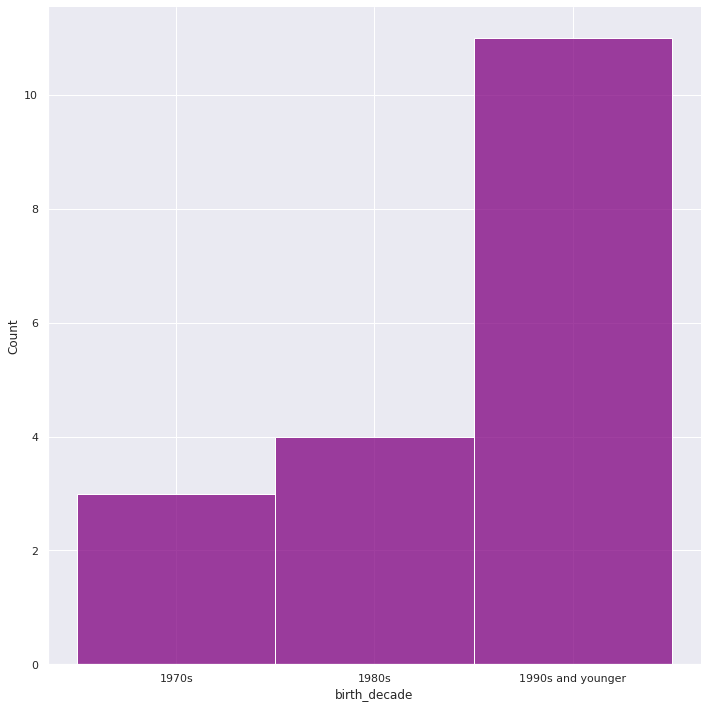

------------------------------------------------------------------------------------------------
United States     10
Canada             3
United Kingdom     3
Puerto Rico        2
Barbados           1
South Korea        1
Name: artist_country, dtype: int64


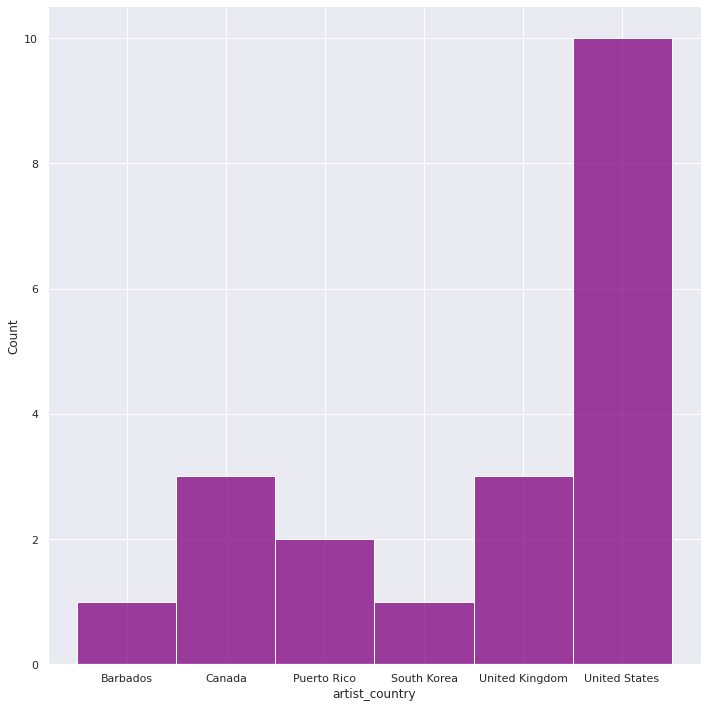

------------------------------------------------------------------------------------------------
male      16
female     5
Name: gender, dtype: int64


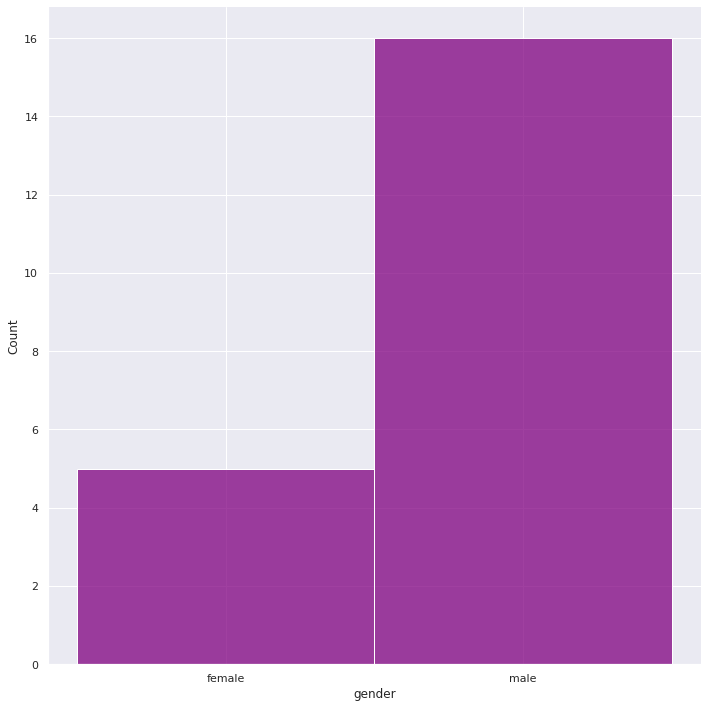

In [ ]:
artist_factor_list = ['artist_genres', 'birth_decade', 'artist_country', 'gender']
for column in artist_factor_list:
    print('------------------------------------------------------------------------------------------------')
    df = df_artist.sort_values(by=column, ascending=True) #the ascending doesn't have any effect on the output and I don't know why, I suggest we remove it.
    print(df[column].value_counts())
    sns.displot(x=column, data=df, height = 10, color='purple')
    plt.show()

In [ ]:
df_artist.describe(include='all')

,artist_name,artist_popularity,artist_genres,birth_decade,artist_country,gender,band
count,20,20.000000,20,18,20,20,20
unique,20,NaN,4,3,6,2,2
top,Bad Bunny,NaN,hip hop / rap,1990s and younger,United States,male,False
freq,1,NaN,9,11,10,15,18
mean,NaN,89.950000,NaN,NaN,NaN,NaN,NaN
std,NaN,3.332061,NaN,NaN,NaN,NaN,NaN
min,NaN,87.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,87.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,89.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,92.000000,NaN,NaN,NaN,NaN,NaN
